In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys 

# project_dir_path = '/home/onoue/ws/lukasiewicz_1'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

import cvxpy as cp 
import numpy as np 
import pandas as pd 

from src.setup_problem_dual_single_task import Setup

from src.objective_function_single_task import ObjectiveFunction
from src.predicate import Predicate_dual

In [18]:
data_dir_path = "./../inputs/toy_data"

file_names_dict = {
    'supervised': ['L_p1.csv', 'L_p2.csv', 'L_p3.csv'],

    'unsupervised': ['U.csv'],
    'rule': ['rules.txt']
}

# problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p3', c1=10, c2=10)

# objective, constraints = problem_instance.main()

# problem = cp.Problem(objective, constraints)
# result = problem.solve(verbose=True)

# 精度は悪くなさそう

 ~~切片 $b_j$ の値の調整ができていない気がする~~

load_data took 0.00888824462890625 seconds!
load_rules took 0.0010998249053955078 seconds!
formulate_predicates_with_cvxpy took 9.584426879882812e-05 seconds!
(6, 6)
_construct_P_j took 0.003971099853515625 seconds!
construct_constraints took 0.016021013259887695 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 26 01:33:57 PM: Your problem has 96 variables, 39 constraints, and 0 parameters.
(CVXPY) Jan 26 01:33:57 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 01:33:57 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 01:33:57 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation     

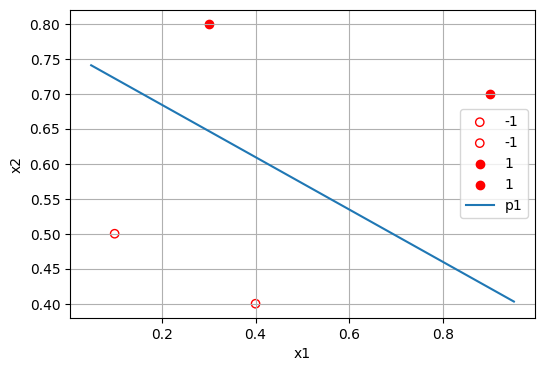


p1: [ 0.75018394  2.00021639 -1.01895801]


In [19]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p1', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

p1 = Predicate_dual(problem_instance, 'p1')
# p2 = Predicate_dual(problem_instance, 'p2')
# p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p1]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p1: {p1.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

load_data took 0.00641322135925293 seconds!
load_rules took 0.0009348392486572266 seconds!
formulate_predicates_with_cvxpy took 5.125999450683594e-05 seconds!
(6, 6)
_construct_P_j took 0.0045278072357177734 seconds!
construct_constraints took 0.014964103698730469 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 26 01:34:11 PM: Your problem has 96 variables, 39 constraints, and 0 parameters.
(CVXPY) Jan 26 01:34:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 01:34:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 01:34:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation    

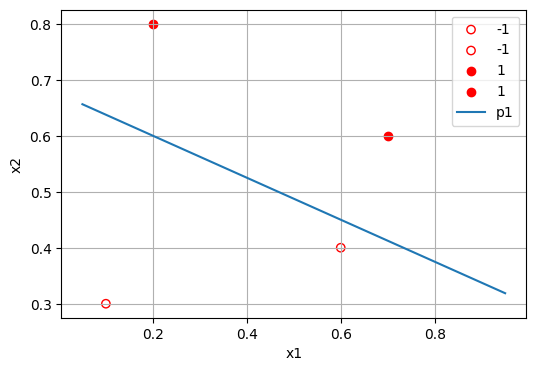


p2: [ 0.69761212  1.86045799 -0.75578529]


In [20]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p2', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

# p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
# p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p2]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p2: {p2.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

load_data took 0.006711006164550781 seconds!
load_rules took 0.0007302761077880859 seconds!
formulate_predicates_with_cvxpy took 5.3882598876953125e-05 seconds!
(6, 6)
_construct_P_j took 0.00492405891418457 seconds!
construct_constraints took 0.015191078186035156 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 26 01:34:23 PM: Your problem has 96 variables, 39 constraints, and 0 parameters.
(CVXPY) Jan 26 01:34:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 26 01:34:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 26 01:34:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation    

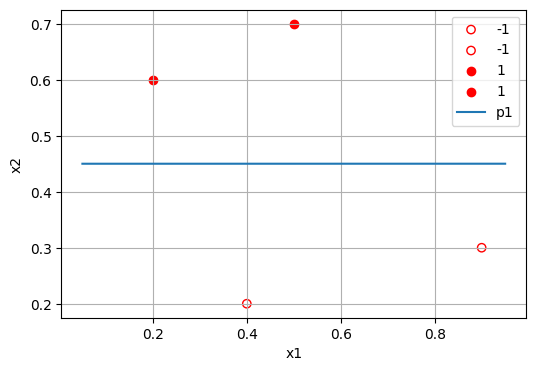


p3: [-1.06593605e-04  2.00000181e+00 -3.99947520e-01]


In [21]:
problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, 'p3', c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)


import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

# p1 = Predicate_dual(problem_instance, 'p1')
# p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')



# ps = [p1, p2, p3]
ps = [p3]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

print()
print(f'p3: {p3.coeff}')

```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

In [5]:
p1 = Predicate_dual(problem_instance, 'p1')
# X = problem_instance.L['p1'][:, :-1]
# Y = problem_instance.L['p1'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p1(x))

p2 = Predicate_dual(problem_instance, 'p2')
# X = problem_instance.L['p2'][:, :-1]
# Y = problem_instance.L['p2'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p2(x))

p3 = Predicate_dual(problem_instance, 'p3')
# X = problem_instance.L['p3'][:, :-1]
# Y = problem_instance.L['p3'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p3(x))

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

# print(- p1.coeff[2] / p1.coeff[1] + 0.5 / p1.coeff[1])
# print(- p2.coeff[2] / p2.coeff[1] + 0.5 / p2.coeff[1])
# print(- p3.coeff[2] / p3.coeff[1] + 0.5 / p3.coeff[1])

0
0 6
1
6 12
2
12 18
p1: [ 0.75000668  2.00006645 -1.01879271]
p2: [ 0.24355032  1.95084369 -0.62161307]
p3: [-5.39910858e-05  2.00031104e+00 -4.00112971e-01]


In [115]:
p1 = Predicate_dual(problem_instance, 'p1')
# X = problem_instance.L['p1'][:, :-1]
# Y = problem_instance.L['p1'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p1(x))

p2 = Predicate_dual(problem_instance, 'p2')
# X = problem_instance.L['p2'][:, :-1]
# Y = problem_instance.L['p2'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p2(x))

p3 = Predicate_dual(problem_instance, 'p3')
# X = problem_instance.L['p3'][:, :-1]
# Y = problem_instance.L['p3'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p3(x))

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

print(- p1.coeff[2] / p1.coeff[1] + 0.5 / p1.coeff[1])
print(- p2.coeff[2] / p2.coeff[1] + 0.5 / p2.coeff[1])
print(- p3.coeff[2] / p3.coeff[1] + 0.5 / p3.coeff[1])

p1: [ 0.74999529  1.99998975 -1.01874184]
p2: [-35.30163754 -24.13922316  26.27943897]
p3: [-71.999874   -51.99989429  60.49988719]
0.7593748158231226
1.0679481604713514
1.1538463300762016


```
[ 0.75   2.    -1.075]
[ 0.31976744  1.93604651 -0.6127907 ]
[ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

In [7]:
p1 = Predicate_dual(problem_instance, 'p1')
# X = problem_instance.L['p1'][:, :-1]
# Y = problem_instance.L['p1'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p1(x))

p2 = Predicate_dual(problem_instance, 'p2')
# X = problem_instance.L['p2'][:, :-1]
# Y = problem_instance.L['p2'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p2(x))

p3 = Predicate_dual(problem_instance, 'p3')
# X = problem_instance.L['p3'][:, :-1]
# Y = problem_instance.L['p3'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p3(x))

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

print(- p1.coeff[2] / p1.coeff[1] + 0.5 / p1.coeff[1])
print(- p2.coeff[2] / p2.coeff[1] + 0.5 / p2.coeff[1])
print(- p3.coeff[2] / p3.coeff[1] + 0.5 / p3.coeff[1])

p1: [ 1.64599155 14.54392469 -7.456264  ]
p2: [-31.99999978 -12.00000719  24.30000494]
p3: [-71.99984808 -51.99936977  66.96624952]
0.5470506873600542
1.9833325559449433
1.2782125978413794


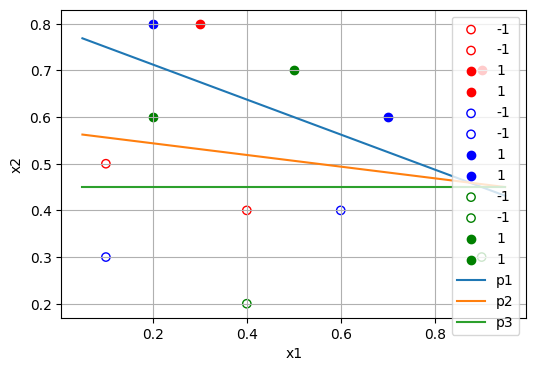

# pima indian 計算コスト

In [3]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes_cv/fold_0')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rule.txt']
}

In [4]:
train_data_dir_path = os.path.join(data_dir_path, "train")

problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction, 'Outcome', c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.04276585578918457 seconds!
load_rules took 0.09793782234191895 seconds!
formulate_predicates_with_cvxpy took 0.00015306472778320312 seconds!
shape of P: (8422, 8422)
finish l
(150, 150)


KeyboardInterrupt: 